# Analysis of the protocols of the Presidential Election in Poland 2020

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [46]:
elections = pd.read_excel('wyniki_PL.xlsx')

In [7]:
elections.head(1)

,Symbol kontrolny,Nr OKW,Kod TERYT,Typ gminy,Numer obwodu,Typ obszaru,Typ obwodu,Siedziba,Gmina,Powiat,...,Krzysztof BOSAK,Andrzej Sebastian DUDA,Szymon Franciszek HOŁOWNIA,Marek JAKUBIAK,Władysław Marcin KOSINIAK-KAMYSZ,Mirosław Mariusz PIOTROWSKI,Paweł Jan TANAJNO,Rafał Kazimierz TRZASKOWSKI,Waldemar Włodzimierz WITKOWSKI,Stanisław Józef ŻÓŁTEK
0,9924-e2c7-444e-4601-e5ef-60b9-f73d-d8ba,2.0,20101.0,gmina miejska,1,miasto,stały,"Szkoła Podstawowa Nr 3, ul. Ceramiczna 5, 59-7...",m. Bolesławiec,bolesławiecki,...,70,367,164,2,15,1,3,338,1,2


In [8]:
elections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27229 entries, 0 to 27228
Data columns (total 44 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Symbol kontrolny                                                                               27229 non-null  object 
 1   Nr OKW                                                                                         27225 non-null  float64
 2   Kod TERYT                                                                                      27225 non-null  float64
 3   Typ gminy                                                                                      27225 non-null  object 
 4   Numer obwodu                                                                                   27229 non-null  int64  
 5   Typ obszaru       

In [48]:
elections = elections[pd.to_numeric(elections['Liczba wyborców uprawnionych do głosowania'], errors='coerce').notna()]
len(elections)

27225

In [49]:
elections['Liczba wyborców uprawnionych do głosowania'] = elections['Liczba wyborców uprawnionych do głosowania'].astype(int)
elections['Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów'] = elections['Liczba wyborców, którym wydano karty do głosowania'].astype(int)
elections['Liczba wyborców, którym wysłano pakiety wyborcze'] = elections['Liczba wyborców, którym wysłano pakiety wyborcze'].astype(int)


elections['Andrzej Sebastian DUDA'] = elections['Andrzej Sebastian DUDA'].astype(int)
elections['Rafał Kazimierz TRZASKOWSKI'] = elections['Rafał Kazimierz TRZASKOWSKI'].astype(int)

In [50]:
# choose meaningful data
columns = ['Powiat', 'Gmina', 'Siedziba', 'Województwo', 'Liczba wyborców uprawnionych do głosowania',
           'Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów', 
           'Robert BIEDROŃ', 'Krzysztof BOSAK', 'Andrzej Sebastian DUDA', 'Szymon Franciszek HOŁOWNIA', 'Rafał Kazimierz TRZASKOWSKI', 'Władysław Marcin KOSINIAK-KAMYSZ']

rename_dict = {
            "Liczba wyborców uprawnionych do głosowania": "all_voters",
            "Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów": "voted"}

votes = pd.DataFrame(elections[columns])
votes.rename(inplace=True, columns=rename_dict)
votes.head()

,Powiat,Gmina,Siedziba,Województwo,all_voters,voted,Robert BIEDROŃ,Krzysztof BOSAK,Andrzej Sebastian DUDA,Szymon Franciszek HOŁOWNIA,Rafał Kazimierz TRZASKOWSKI,Władysław Marcin KOSINIAK-KAMYSZ
0,bolesławiecki,m. Bolesławiec,"Szkoła Podstawowa Nr 3, ul. Ceramiczna 5, 59-7...",dolnośląskie,1553,977,19,70,367,164,338,15
1,bolesławiecki,m. Bolesławiec,"Szkoła Podstawowa Nr 3, ul. Ceramiczna 5, 59-7...",dolnośląskie,1346,909,17,62,311,136,365,15
2,bolesławiecki,m. Bolesławiec,"Szkoła Podstawowa Nr 5, ul. Dolne Młyny 60, 59...",dolnośląskie,1414,898,19,66,326,176,300,9
3,bolesławiecki,m. Bolesławiec,"Szkoła Podstawowa Nr 5, ul. Dolne Młyny 60, 59...",dolnośląskie,1413,956,18,75,329,159,363,12
4,bolesławiecki,m. Bolesławiec,"Szkoła Podstawowa Nr 5, ul. Dolne Młyny 60, 59...",dolnośląskie,1360,835,13,52,304,125,326,9


In [51]:
votes = votes[votes["voted"] != 0]

In [52]:
len(votes)

27137

In [60]:
votes.loc[1257, "Andrzej Sebastian DUDA"] = 7

In [61]:
# let's calculate some informative data
votes["turnout"] = round(votes["voted"] / votes['all_voters'], 5)
votes["duda_%"] = round(votes["Andrzej Sebastian DUDA"] / votes['voted'], 5)
votes["rafal_%"] = round(votes["Rafał Kazimierz TRZASKOWSKI"] / votes['voted'], 5)
#votes["early_voters_%"] = round(votes["early_voters"] / votes['all_voters'], 5)

In [66]:
len(votes[(votes["duda_%"] > 1) | (votes["rafal_%"] > 1)])

13

In [67]:
len(votes)

27137

In [68]:
votes = votes[(votes["duda_%"] <= 1) & (votes["rafal_%"] <= 1)]
len(votes)

27124

In [69]:
votes[["Andrzej Sebastian DUDA", "duda_%", "Rafał Kazimierz TRZASKOWSKI", "rafal_%", "voted"]]

,Andrzej Sebastian DUDA,duda_%,Rafał Kazimierz TRZASKOWSKI,rafal_%,voted
0,367,0.37564,338,0.34596,977
1,311,0.34213,365,0.40154,909
2,326,0.36303,300,0.33408,898
3,329,0.34414,363,0.37971,956
4,304,0.36407,326,0.39042,835
...,...,...,...,...,...
27219,259,0.32702,278,0.35101,792
27220,176,0.32653,210,0.38961,539
27221,103,0.32803,117,0.37261,314
27222,258,0.35635,305,0.42127,724


### Each dot is a polling station. The color defines the candidate

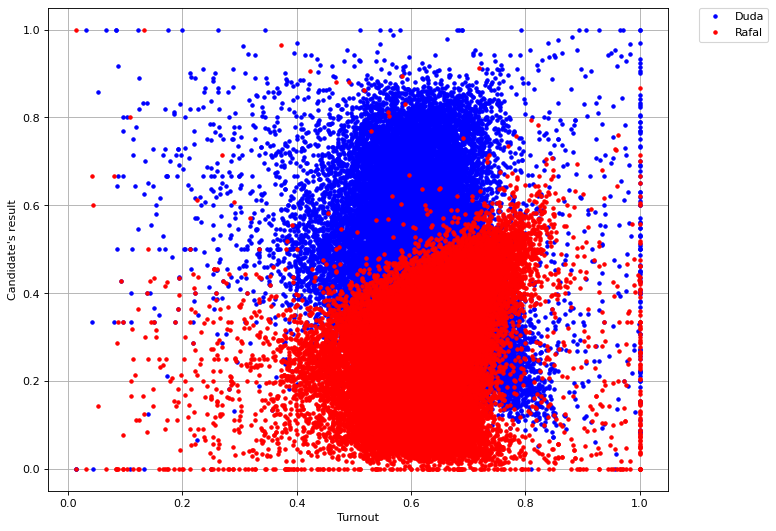

In [70]:
draw_dots(votes)

In [71]:
votes["Województwo"].unique()

array(['dolnośląskie', 'kujawsko-pomorskie', 'lubelskie', 'lubuskie',
       'łódzkie', 'małopolskie', 'mazowieckie', 'opolskie',
       'podkarpackie', 'podlaskie', 'pomorskie', 'śląskie',
       'świętokrzyskie', 'warmińsko-mazurskie', 'wielkopolskie',
       'zachodniopomorskie'], dtype=object)

#### In regions

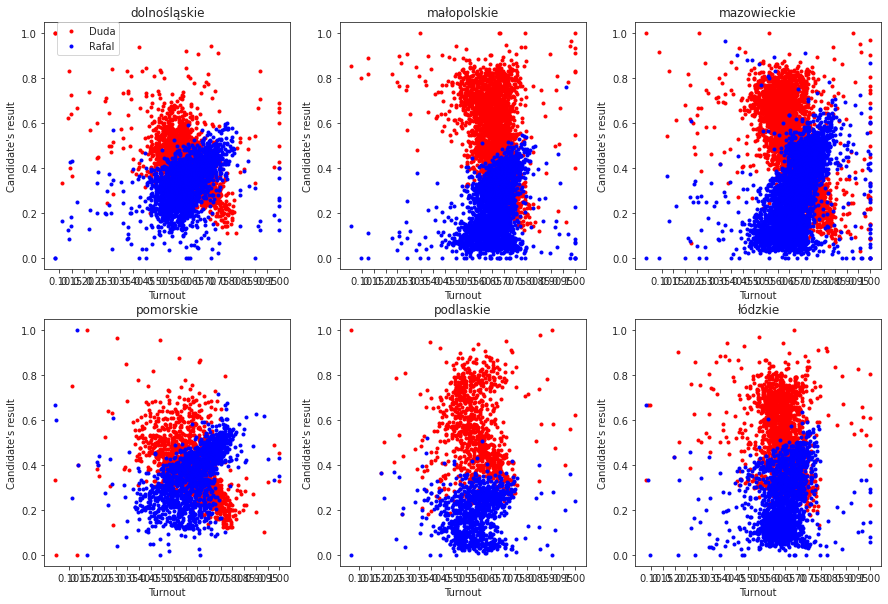

In [111]:
dolny = votes[votes['Województwo'] == 'dolnośląskie']
malo = votes[votes['Województwo'] == 'małopolskie']
mazow = votes[votes['Województwo'] == 'mazowieckie']
morze = votes[votes['Województwo'] == 'pomorskie']
podlas = votes[votes['Województwo'] == 'podlaskie']
lodz = votes[votes['Województwo'] == 'łódzkie']

wojew_data = [dolny, malo, mazow, morze, podlas, lodz]
labels = ['dolnośląskie', 'małopolskie', 'mazowieckie', 'pomorskie', 'podlaskie', 'łódzkie']

draw_regions(wojew_data, labels)

### In region centers

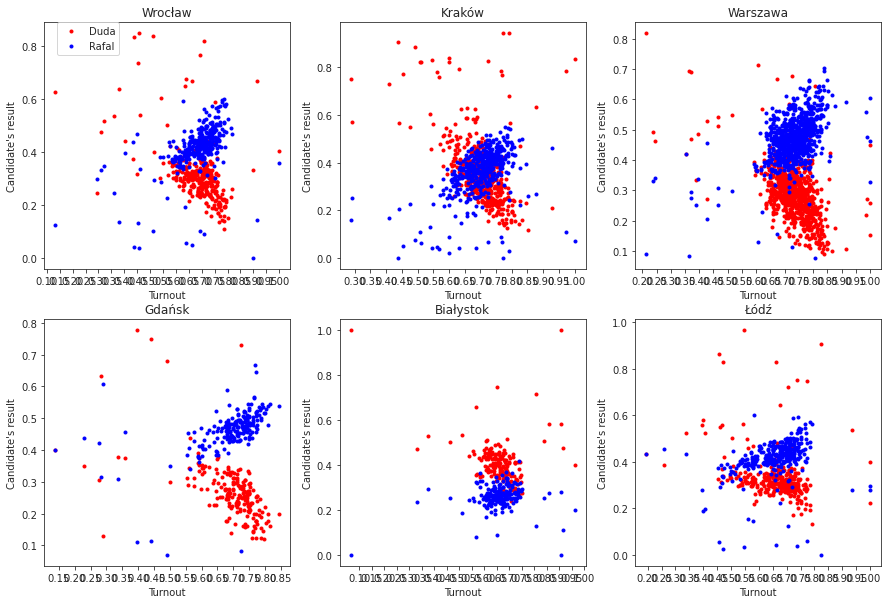

In [112]:
dolny = votes[votes['Powiat'] == 'Wrocław']
malo = votes[votes['Powiat'] == 'Kraków']
mazow = votes[votes['Powiat'] == 'Warszawa']
morze = votes[votes['Powiat'] == 'Gdańsk']
podlas = votes[votes['Powiat'] == 'Białystok']
lodz = votes[votes['Powiat'] == 'Łódź']

wojew_data = [dolny, malo, mazow, morze, podlas, lodz]
labels = ['Wrocław', 'Kraków', 'Warszawa', 'Gdańsk', 'Białystok', 'Łódź']

draw_regions(wojew_data, labels)

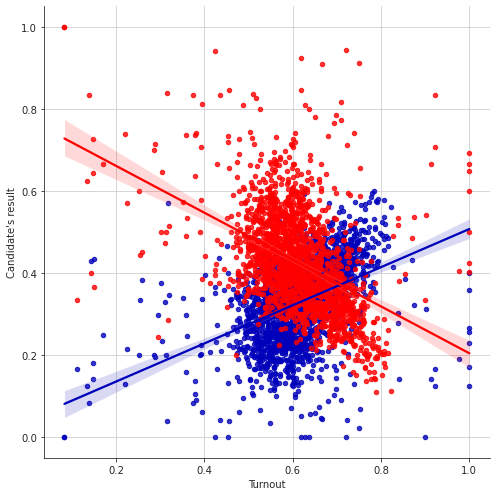

In [80]:
dolny = votes[votes['Województwo'] == 'dolnośląskie']
draw_regression_plot(dolny)

### Graph of the "Turnout - Number of Votes for a Candidate" Relationship

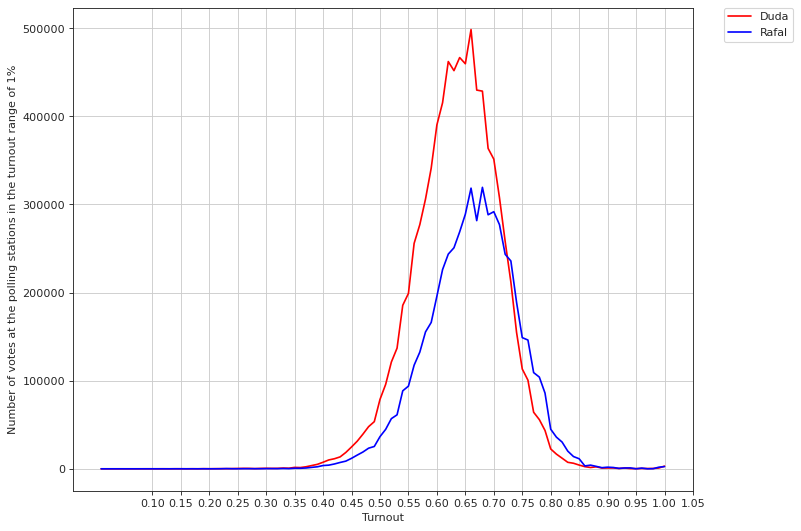

In [118]:
# Round up the turnout to a percentage (0.85, instead of 0.84996)
votes["turnout_rounded"] = round(votes["turnout"], 2)

grouped = votes.groupby(['turnout_rounded']).sum()
draw_grouped_plot(grouped)

### Distribution of the last digits in the protocol results
We take all 3 and 4-digit numbers from the protocol (columns that contain votes for candidates), select the last digit and count how many times it occurs.

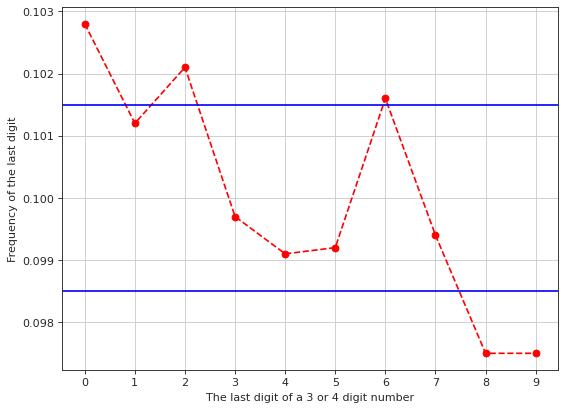

In [121]:
last_number_distribution(votes)

### Regions with the most wins for Rafal

In [136]:
rafal_win_df = votes[votes["Rafał Kazimierz TRZASKOWSKI"] > votes["Andrzej Sebastian DUDA"]]
rafal_win_df["Województwo"].value_counts().head(5)

mazowieckie      1056
wielkopolskie     803
śląskie           696
dolnośląskie      693
pomorskie         684
Name: Województwo, dtype: int64

In [138]:
rafal_win_df[rafal_win_df["Województwo"]=="mazowieckie"].Gmina.value_counts().head(10)

Mokotów           94
Praga-Południe    81
zagranica         66
Ursynów           64
Białołęka         57
Wola              56
Bemowo            50
Bielany           45
Ochota            42
Śródmieście       41
Name: Gmina, dtype: int64

In [137]:
duda_win_df = votes[votes["Rafał Kazimierz TRZASKOWSKI"] < votes["Andrzej Sebastian DUDA"]]
duda_win_df["Województwo"].value_counts().head(5)

mazowieckie     2485
małopolskie     2073
śląskie         2044
lubelskie       1854
podkarpackie    1798
Name: Województwo, dtype: int64

In [152]:
duda_win_df[duda_win_df["Województwo"]=="mazowieckie"].Gmina.value_counts().head(10)

m. Radom         111
m. Płock          58
m. Siedlce        42
m. Ostrołęka      29
gm. Wołomin       29
gm. Wyszków       28
m. Ciechanów      24
m. Otwock         23
gm. Kozienice     23
m. Żyrardów       21
Name: Gmina, dtype: int64

### Where does Duda have less than 20%?

In [159]:
votes[['Gmina', 'Siedziba', 'voted', 'Rafał Kazimierz TRZASKOWSKI', 'Andrzej Sebastian DUDA', 'rafal_%', 'duda_%']][(votes['duda_%'] < 0.2) & (votes['duda_%'] > 0)].sort_values(by='rafal_%')

,Gmina,Siedziba,voted,Rafał Kazimierz TRZASKOWSKI,Andrzej Sebastian DUDA,rafal_%,duda_%
2494,gm. Wielgie,"Świetlica Domu Pomocy Społecznej w Nowej Wsi, ...",56,2,5,0.03571,0.08929
19653,m. Lubliniec,"Dom Pomocy Społecznej „ZAMECZEK"", ul. 74 GPP 2...",23,1,4,0.04348,0.17391
24617,gm. Rydzyna,"NZOZ Zakład Pielęgnacyjno-Opiekuńczy ""Niezapom...",15,2,2,0.13333,0.13333
16971,m. Hajnówka,Zakład Pielęgnacyjno-Opiekuńczy Samodzielnego ...,11,2,2,0.18182,0.18182
11553,gm. Bielsk,"Dom Pomocy Społecznej, Goślice 66, 09-230 Bielsk",24,6,2,0.25000,0.08333
...,...,...,...,...,...,...,...
13923,zagranica,"Malezja, Kuala Lumpur, Ambasada RP No. 10 Loro...",97,76,5,0.78351,0.05155
13872,zagranica,"Zagrzeb, Ambasada RP Miramarska cesta 23 (VI p...",142,118,27,0.83099,0.19014
13902,zagranica,"Japonia, Tokio, Ambasada RP 2 - 13 - 5 Mita, M...",292,252,54,0.86301,0.18493
13878,zagranica,"Kair, Ambasada RP 5 El-Aziz Osman Street Zamal...",66,59,11,0.89394,0.16667


### Where does Rafal have less than 20%?

In [162]:
votes[['Gmina', 'voted', 'Rafał Kazimierz TRZASKOWSKI', 'Andrzej Sebastian DUDA', 'rafal_%', 'duda_%']][(votes['rafal_%'] < 0.2) & (votes['rafal_%'] > 0)].sort_values(by='duda_%')

,Gmina,voted,Rafał Kazimierz TRZASKOWSKI,Andrzej Sebastian DUDA,rafal_%,duda_%
2494,gm. Wielgie,56,2,5,0.03571,0.08929
24617,gm. Rydzyna,15,2,2,0.13333,0.13333
19653,m. Lubliniec,23,1,4,0.04348,0.17391
16971,m. Hajnówka,11,2,2,0.18182,0.18182
14005,zagranica,9,1,2,0.11111,0.22222
...,...,...,...,...,...,...
4059,gm. Krasnystaw,100,8,97,0.08000,0.97000
17211,gm. Dąbrowa Białostocka,42,1,41,0.02381,0.97619
14925,gm. Brzozów,49,1,48,0.02041,0.97959
15556,gm. Horyniec-Zdrój,59,1,58,0.01695,0.98305


In [39]:
def draw_dots(df):
    l = 10
    h = 8
    
    plt.figure(figsize=(l, h), dpi=80)

    plt.plot(df["turnout"], df["duda_%"], 'b.', label="Duda")
    plt.plot(df["turnout"], df["rafal_%"] , 'r.', label="Rafal")

    plt.xlabel('Turnout')
    plt.ylabel("Candidate's result")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    #plt.xticks(np.arange(0.5, 1.1, 0.05))
    plt.grid()

    plt.show()

In [117]:
def draw_grouped_plot(grouped):
    plt.figure(figsize=(10, 8), dpi=80)
    
    plt.plot(grouped['Andrzej Sebastian DUDA'], 'r', label="Duda")
    plt.plot(grouped['Rafał Kazimierz TRZASKOWSKI'], 'b', label="Rafal")

    plt.xlabel('Turnout')
    plt.ylabel('Number of votes at the polling stations in the turnout range of 1%')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xticks(np.arange(0.1, 1.1, 0.05))
    
    sns.set_style("ticks",{'axes.grid': False})
    plt.grid()

    plt.show()

In [110]:
def draw_regions(dfs, labels):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    plt.setp(axs, xticks=np.arange(0.1, 1.1, 0.05))
    plt.sca(axs[0, 0])
    
    for i, df in enumerate(dfs):
        row = i // 3
        col = i % 3
        
        axs[row, col].plot(df["turnout"], df["duda_%"] , 'r.', label="Duda")
        axs[row, col].plot(df["turnout"], df["rafal_%"], 'b.', label="Rafal")
        axs[row, col].set_title(labels[i])
        axs[row, col].grid()

            
    plt.legend(bbox_to_anchor=(0.05, 1), loc='upper left', borderaxespad=0.)

    for ax in axs.flat:
        ax.set(xlabel='Turnout', ylabel="Candidate's result")

In [120]:
def last_number_distribution(df):
    
    columns = ['Robert BIEDROŃ', 'Krzysztof BOSAK', 'Andrzej Sebastian DUDA', 'Szymon Franciszek HOŁOWNIA', 'Rafał Kazimierz TRZASKOWSKI', 'Władysław Marcin KOSINIAK-KAMYSZ']
    m = {}
    hist = []

    for column in columns:
        for n in df[column].values:
            if n/100 >= 1:
                x = int(n%10)
                m[x] = m.get(x, 0) + 1
                hist.append(x)

    summa = sum(m.values())

    m.update((x, round(y/summa, 4)) for x, y in m.items())
    m = sorted(m.items())
    x, y = zip(*m) # unpack a list of pairs into two tuples


    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x, y, 'r', linestyle='--', marker='o')
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.xlabel('The last digit of a 3 or 4 digit number')
    plt.ylabel('Frequency of the last digit')

    sns.set_style("ticks",{'axes.grid': False})
    plt.grid()
    plt.axhline(y=0.0985, color='b', linestyle='-')
    plt.axhline(y=0.1015, color='b', linestyle='-')
    plt.show()

In [79]:
def draw_regression_plot(df):
    svet_df = df[['turnout', 'duda_%']]
    svet_df = svet_df.rename({'duda_%': 'Percentage of votes'}, axis=1) 
    svet_df['is_duda'] = 1

    luka_df = df[['turnout', 'rafal_%']]
    luka_df = luka_df.rename({'rafal_%': 'Percentage of votes'}, axis=1) 
    luka_df['is_duda'] = 0

    data = pd.concat([svet_df, luka_df]).reset_index(drop=True)

    sns.set_style("ticks",{'axes.grid' : True})
    sns.lmplot(x="turnout", y="Percentage of votes",
                   hue="is_duda", data=data, height=7,
                   palette=['#0000bb', '#ff0000'], legend=False, scatter_kws={"s": 20})
    plt.xlabel('Turnout')
    plt.ylabel("Candidate's result")

In [42]:
df = pd.DataFrame({"Name" : ["Tom", "Mike", "Rick"],
                   "Age" : [25, 32, 54]}) 

def highlight_cols(x):
    df = x.copy()
    df['Age'] = 'background-color: lightgreen'
    return df 
  
#display(df.style.apply(highlight_cols, axis = None))

### «Использованная литература»

Анализ проведен по следам видео Савватеева "Разбор выборов с Сергеем Шпилькиным"
- Ссылка на видео: https://www.youtube.com/watch?v=AbAPzs3P2Yo&t=1s
- Материалы в видео: https://disk.yandex.ru/i/bgGIGT4iWkL0Hg
- Доклад об электронном голосовании в Москве: https://drive.google.com/file/d/1L9U2ssdjw_nRJMjBIzebhPDppfoWZgmJ/view

### Приложение (aka bonus track)

Джерриме́ндеринг — произвольная демаркация избирательных округов с целью искусственного изменения соотношения политических сил в них и, как следствие, в целом на территории проведения выборов. https://ru.wikipedia.org/wiki/Джерримендеринг.

Иллюстрация возможностей разделения на электоральные округа: хотя во всех случаях в выборах участвуют 36 зелёных и 28 фиолетовых избирателей, число доставшихся кандидатам округов может равняться как 3:1 и 4:0 (слева), так и 2:2 и даже 1:3 (справа) в зависимости от выбора разделения.

<img src="https://imgur.com/O6wES9M.jpg" style="width: 500px;"/>